## <u>Author</u>: Priya Suresh

# <u>Task 1</u>: Prediction Using Supervised ML
### @GRIP: The Sparks Foundation

## <u>Problem Statement</u>: What will be predicted score if student studies for 9.25 hrs/day?

#### Step 1: Importing the required libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Step 2: Reading the dataset

In [3]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(url)
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.shape

(25, 2)

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Data Visualization

#### Step 3: Plotting the scores

<function matplotlib.pyplot.show(close=None, block=None)>

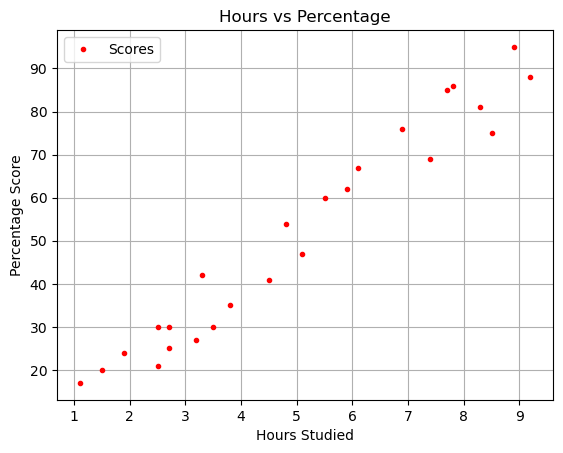

In [8]:
data.plot(x="Hours",y="Scores",style='r.')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid(True)
plt.show

#### Step 4: Dividing the data into "attributes" & "labels"

In [11]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values


#### Step 5: Splitting the data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#### Step 6: Training the Algorithm

In [17]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)
print("Training Complete")

Training Complete


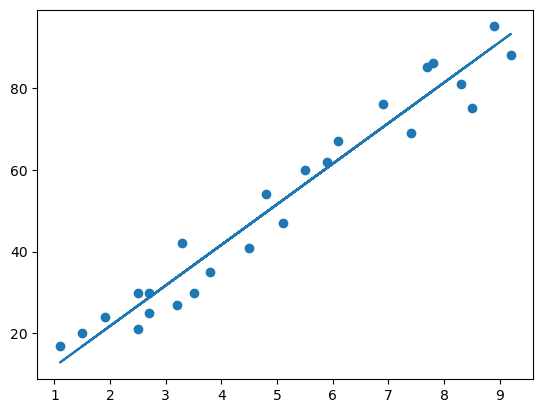

In [19]:
line=regressor.coef_*X+regressor.intercept_
plt.scatter(X,y)
plt.plot(X, line);
plt.show()

Train Set Score
0.9515510725211552


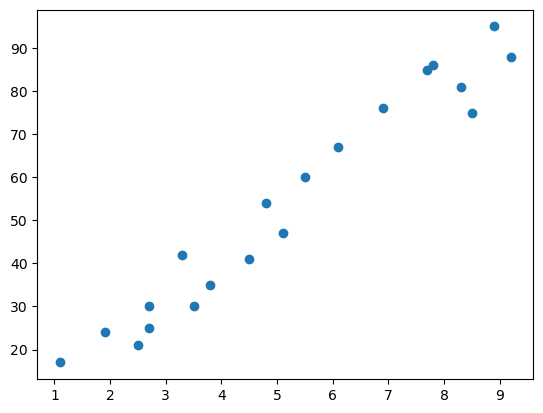

In [20]:
plt.scatter(X_train, y_train)
print("Train Set Score")
print(regressor.score(X_train,y_train))

#### Step 7: Calculating the accuracy of the model

Test Score
0.9454906892105356


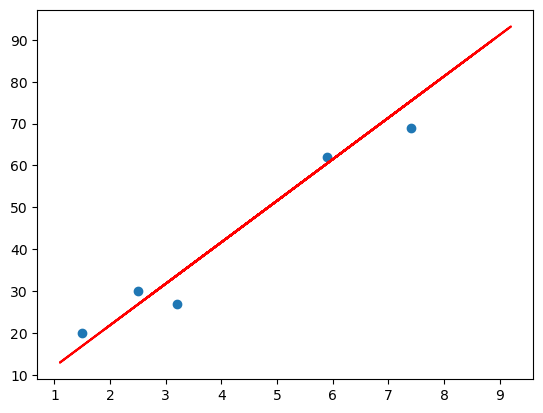

In [21]:
print("Test Score")
print(regressor.score(X_test,y_test))
plt.scatter(X_test,y_test)
plt.plot(X_train,regressor.predict(X_train),color="r")

#### Step 8: Making Predictions

In [22]:
print(X_test)
y_pred=regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [31]:
# Comparing actual vs Predicted scores 
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Problem Statement Solution 

In [24]:
hours=np.array([9.25,1])
hours.reshape(-1,1)

array([[9.25],
       [1.  ]])

In [32]:
#Predicting for the required 9.25hour
hours=9.25
own_pred=regressor.predict([[hours]])
print("No of hours={}".format(hours))
print("Predicted Score ={}".format(own_pred[0]))

No of hours=9.25
Predicted Score =93.69173248737538


## Evaluating the model

In [26]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975


In [27]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975


In [29]:
print('Root mean squared error:',metrics.mean_squared_error(y_test,y_pred))

Root mean squared error: 21.5987693072174


In [30]:
print('R2 Score:',metrics.r2_score(y_test,y_pred))

R2 Score: 0.9454906892105356
